In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
heartfail_df = pd.read_csv("heart.csv")

In [3]:
heartfail_df.shape

(918, 12)

In [4]:
heartfail_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
#Finding out missing values
heartfail_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
heartfail_df.rename(columns = {'HeartDisease':'HeartFailure','ST_Slope':'Slope'},inplace=True)
heartfail_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='Sex', ylabel='count'>

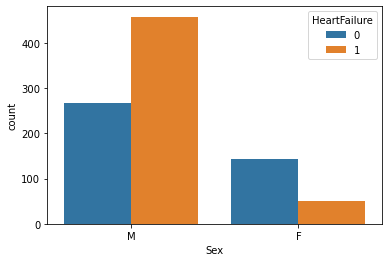

In [67]:
#Who has the highest number of chances of heart failure
sns.countplot(data=heartfail_df, x="Sex",hue="HeartFailure")

<AxesSubplot:xlabel='Age', ylabel='Sex'>

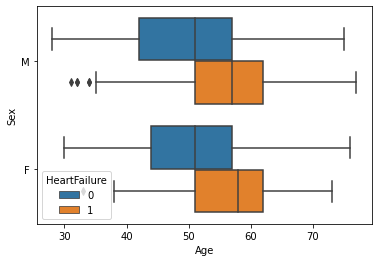

In [69]:
sns.boxplot(data=heartfail_df,x='Age',y='Sex',hue="HeartFailure")

<AxesSubplot:xlabel='count', ylabel='ChestPainType'>

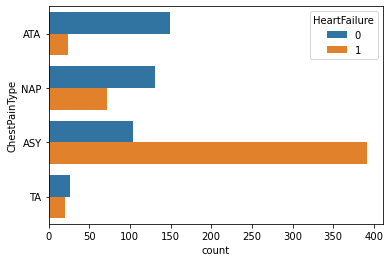

In [11]:
#Which chest pain type is more responsible for heart failure
sns.countplot(data=heartfail_df, y="ChestPainType", hue="HeartFailure")

**Showing correlation between the factors responsible for heart failure**

Text(0.5, 1.0, 'ECG Vs BS')

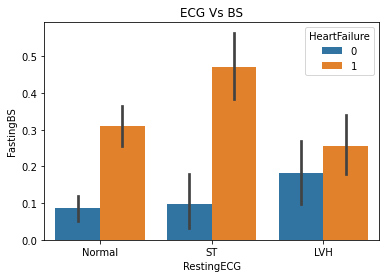

In [30]:
sns.barplot(data=heartfail_df, x="RestingECG", y="FastingBS", hue="HeartFailure")
plt.title('ECG Vs BS')

Text(0.5, 1.0, 'BP Vs Cholesterol')

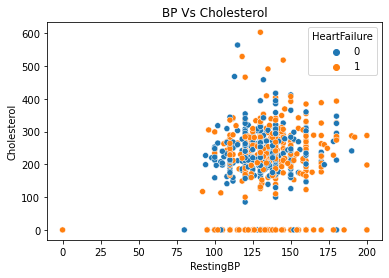

In [64]:
sns.scatterplot(data=heartfail_df, x='RestingBP', y='Cholesterol',hue='HeartFailure')
plt.title('BP Vs Cholesterol')

Text(0.5, 1.0, 'Cholesterol Vs Heart rate')

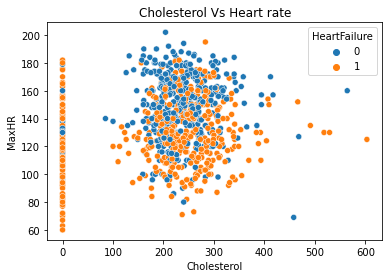

In [63]:
sns.scatterplot(data=heartfail_df, x='Cholesterol', y='MaxHR',hue="HeartFailure")
plt.title('Cholesterol Vs Heart rate')

**Analysis on heart diseased patients**

Text(0.5, 1.0, 'Age of Heart Diseased Patients')

<Figure size 1152x504 with 0 Axes>

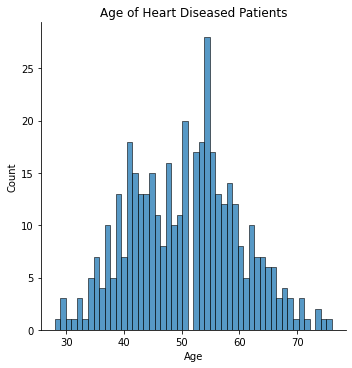

In [61]:
plt.figure(figsize=(16,7))
sns.displot(heartfail_df[heartfail_df['HeartFailure']==0]['Age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients')

Text(0.5, 1.0, 'Cholesterol of Heart Diseased Patients')

<Figure size 1152x504 with 0 Axes>

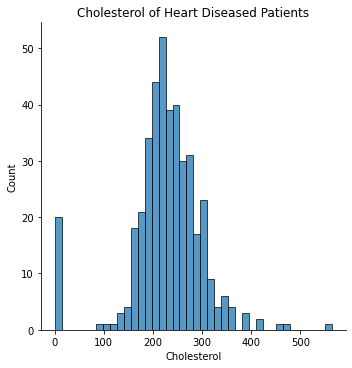

In [60]:
plt.figure(figsize=(16,7))
sns.displot(heartfail_df[heartfail_df['HeartFailure']==0]['Cholesterol'],kde=False,bins=40)
plt.title('Cholesterol of Heart Diseased Patients')

Text(0.5, 1.0, 'Max heart rate of Heart Diseased Patients')

<Figure size 1152x504 with 0 Axes>

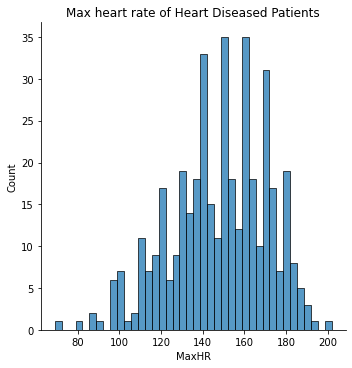

In [59]:
plt.figure(figsize=(16,7))
sns.displot(heartfail_df[heartfail_df['HeartFailure']==0]['MaxHR'],kde=False,bins=40)
plt.title('Max heart rate of Heart Diseased Patients')

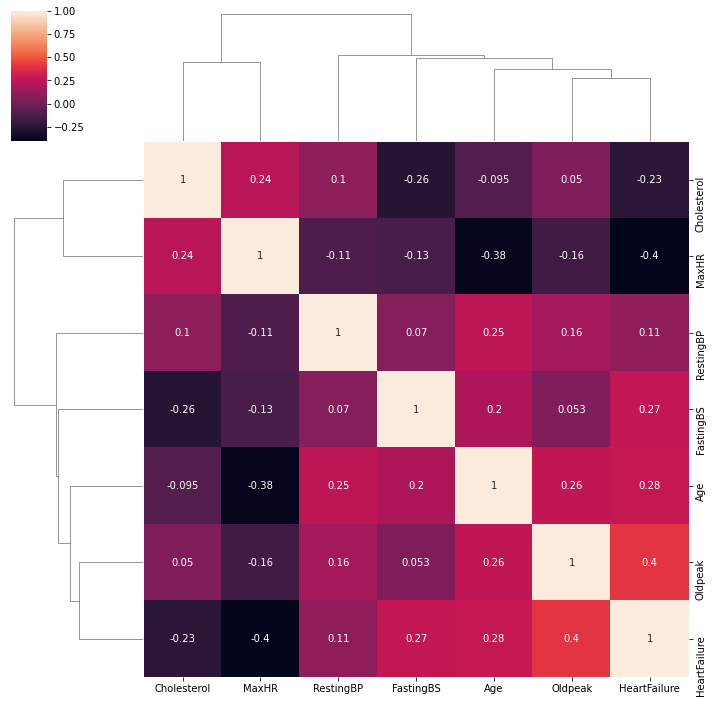

In [29]:
sns.clustermap(heartfail_df.corr(),annot=True)

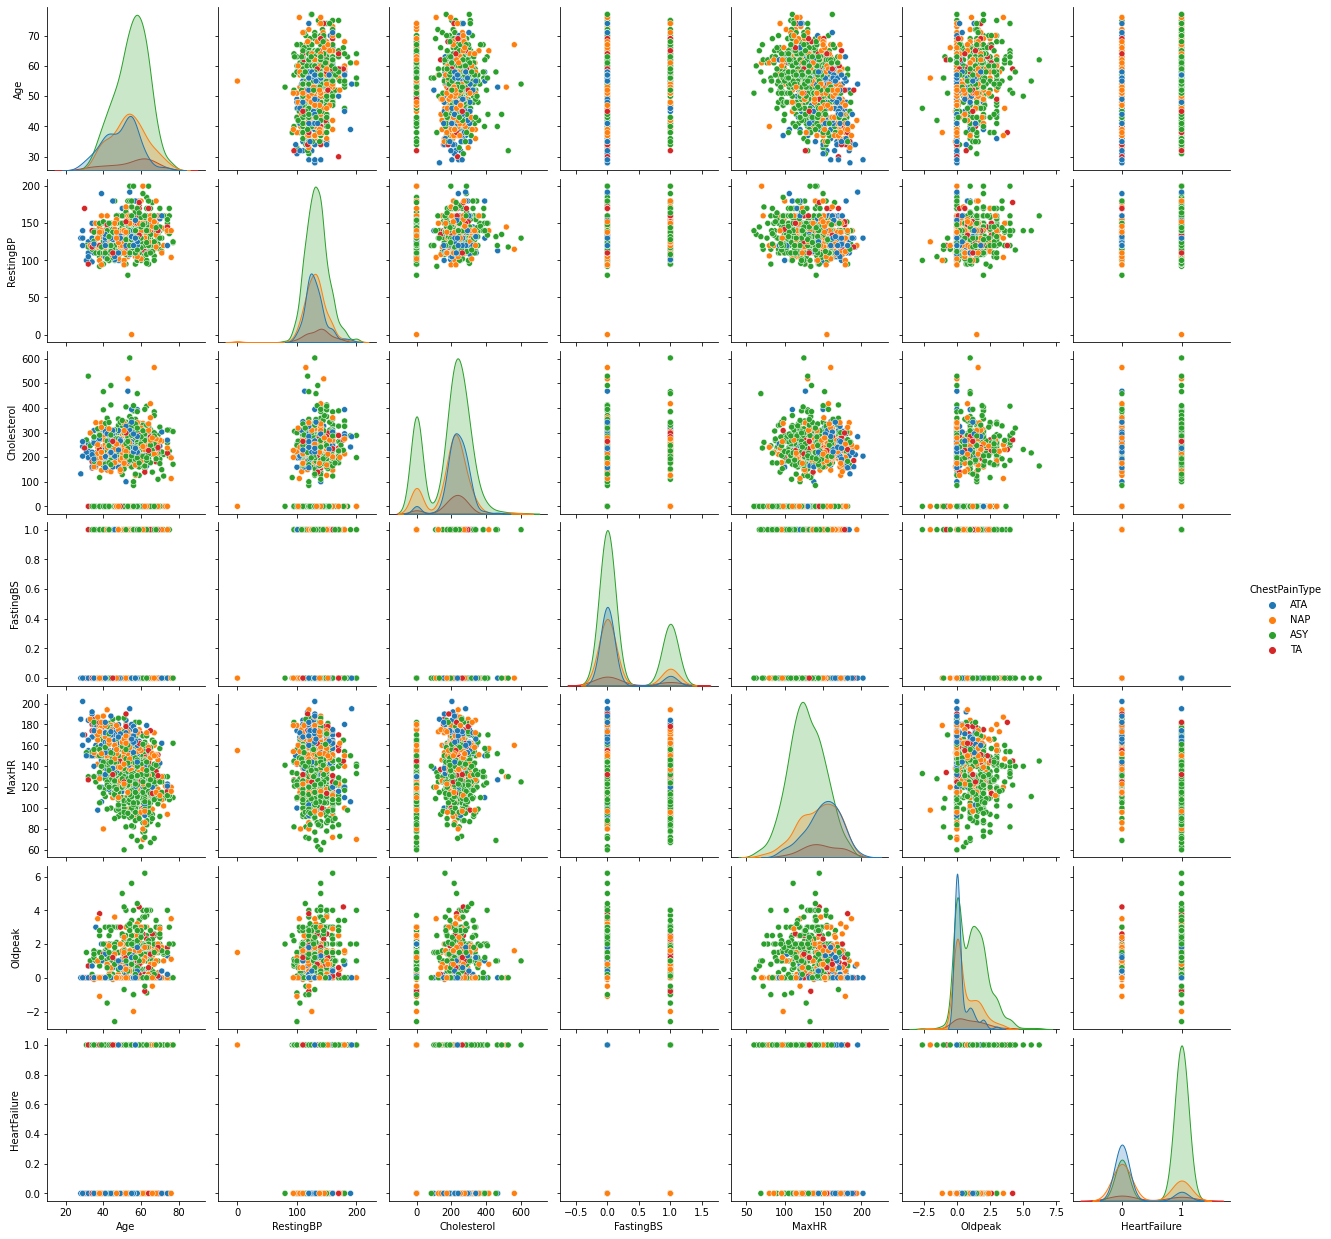

In [41]:
sns.pairplot(heartfail_df,hue='ChestPainType')

**Building a model to predict heart failure**

In [34]:
num_cols = heartfail_df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
cat_cols = heartfail_df[["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","Slope","HeartFailure"]]

In [35]:
cat_cols.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Slope,HeartFailure
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0


In [36]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
cat_cols["Sex"]=lbe.fit_transform(cat_cols["Sex"])
cat_cols.head()

<ipython-input-36-04525e3e028c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols["Sex"]=lbe.fit_transform(cat_cols["Sex"])


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Slope,HeartFailure
0,1,ATA,0,Normal,N,Up,0
1,0,NAP,0,Normal,N,Flat,1
2,1,ATA,0,ST,N,Up,0
3,0,ASY,0,Normal,Y,Flat,1
4,1,NAP,0,Normal,N,Up,0


In [37]:
cat_cols = pd.get_dummies(cat_cols, columns=["ChestPainType"],prefix=["ChestPainType"])
cat_cols.head()

,Sex,FastingBS,RestingECG,ExerciseAngina,Slope,HeartFailure,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1,0,Normal,N,Up,0,0,1,0,0
1,0,0,Normal,N,Flat,1,0,0,1,0
2,1,0,ST,N,Up,0,0,1,0,0
3,0,0,Normal,Y,Flat,1,1,0,0,0
4,1,0,Normal,N,Up,0,0,0,1,0


In [42]:
cat_cols = pd.get_dummies(cat_cols, columns=["RestingECG"],prefix=["RestingECG"])
cat_cols.head()

,Sex,FastingBS,ExerciseAngina,Slope,HeartFailure,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,1,0,N,Up,0,0,1,0,0,0,1,0
1,0,0,N,Flat,1,0,0,1,0,0,1,0
2,1,0,N,Up,0,0,1,0,0,0,0,1
3,0,0,Y,Flat,1,1,0,0,0,0,1,0
4,1,0,N,Up,0,0,0,1,0,0,1,0


In [43]:
lbe = preprocessing.LabelEncoder()
cat_cols["ExerciseAngina"]=lbe.fit_transform(cat_cols["ExerciseAngina"])
cat_cols.head()

,Sex,FastingBS,ExerciseAngina,Slope,HeartFailure,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,1,0,0,Up,0,0,1,0,0,0,1,0
1,0,0,0,Flat,1,0,0,1,0,0,1,0
2,1,0,0,Up,0,0,1,0,0,0,0,1
3,0,0,1,Flat,1,1,0,0,0,0,1,0
4,1,0,0,Up,0,0,0,1,0,0,1,0


In [44]:
cat_cols = pd.get_dummies(cat_cols, columns=["Slope"],prefix=["Slope"])
cat_cols.head()

,Sex,FastingBS,ExerciseAngina,HeartFailure,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Slope_Down,Slope_Flat,Slope_Up
0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,1,1,1,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [45]:
num_cols.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [46]:
df = pd.concat([num_cols,cat_cols],axis=1)
df.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,HeartFailure,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Slope_Down,Slope_Flat,Slope_Up
0,40,140,289,172,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,0,0,1,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,122,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
5,39,120,339,170,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
6,45,130,237,170,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,54,110,208,142,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
8,37,140,207,130,1.5,1,0,1,1,1,0,0,0,0,1,0,0,1,0
9,48,120,284,120,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [47]:
y = df["HeartFailure"]
X = df.drop(["HeartFailure"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20,random_state = 21)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep="\n")

(734, 18)
(734,)
(184, 18)
(184,)


In [48]:
lr_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)
lr_pred = lr_model.predict(X_train)
lr_score = accuracy_score(y_train, lr_pred)
lr_test_pred = lr_model.predict(X_test)
lr_test_score = accuracy_score(y_test, lr_test_pred)

In [49]:
print(f"Train Score: {lr_score:0.10f}",
      f"Train Confusion Matrix:\n{confusion_matrix(y_train, lr_pred)}",
      f"Train Report:\n{classification_report(y_train, lr_pred)}", sep="\n")

print(f"Test Score: {lr_test_score:0.10f}",
      f"Test Confusion Matrix:\n{confusion_matrix(y_test, lr_test_pred)}",
      f"Test Report:\n{classification_report(y_test, lr_test_pred)}", sep="\n")

Train Score: 0.8746594005
Train Confusion Matrix:
[[281  53]
 [ 39 361]]
Train Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       334
           1       0.87      0.90      0.89       400

    accuracy                           0.87       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734

Test Score: 0.8586956522
Test Confusion Matrix:
[[61 15]
 [11 97]]
Test Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        76
           1       0.87      0.90      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



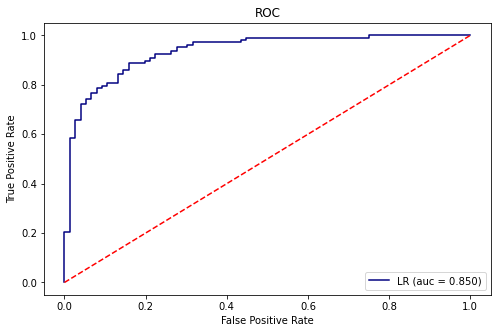

In [50]:
plt.figure(figsize=(8, 5))
roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(
    y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='LR (auc = %0.3f)' %
         roc_auc, color='navy'), plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC'), plt.xlabel('False Positive Rate'), plt.ylabel(
    'True Positive Rate'), plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score

print("Train Cross Validation Array: ", cross_val_score(lr_model, X_train,y_train,cv=5))
print("Train Cross Validation Score: ", cross_val_score(lr_model, X_train,y_train,cv=5).mean())

print("Test Cross Validation Array: ", cross_val_score(lr_model, X_test,y_test,cv=5))
print("Test Cross Validation Score: ", cross_val_score(lr_model, X_test,y_test,cv=5).mean())

Train Cross Validation Array:  [0.89795918 0.87755102 0.83673469 0.80952381 0.88356164]
Train Cross Validation Score:  0.8610660702637218
Test Cross Validation Array:  [0.86486486 0.81081081 0.94594595 0.81081081 0.88888889]
Test Cross Validation Score:  0.8642642642642644


In [52]:
lr_cv_score = cross_val_score(lr_model,X,y,cv=10).mean()
print("Prelive Model Cross Validation Score: ", lr_cv_score)

Prelive Model Cross Validation Score:  0.853810320114668
